# Predicting NEE on grid

In [2]:
import sys
import xarray as xr
from joblib import load
from datacube.utils.dask import start_local_dask

sys.path.append('/g/data/os22/chad_tmp/dea-notebooks/Tools/dea_tools')
from classification import predict_xr

In [3]:
client = start_local_dask(mem_safety_margin='2Gb')
client

distributed.diskutils - INFO - Found stale lock file and directory '/local/u46/cb3058/tmp/dask-worker-space/worker-vywua0g0', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 1
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44305,Workers: 1
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:44029,Total threads: 16
Dashboard: /proxy/43763/status,Memory: 44.92 GiB
Nanny: tcp://127.0.0.1:35335,


### Open model

In [15]:
model = load('/g/data/os22/chad_tmp/NEE_modelling/results/ml_model.joblib').set_params(n_jobs=1)

/home/547/cb3058/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/547/cb3058/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Predict each time-step seperately

- TO DO: fix timesteps that come back from `predict_xr`

In [36]:
results = []
for i in range(1, 4): #start from 1 as forst time-step doesn't have lags
    predicted = predict_xr(model,
                        data.isel(time=i).chunk(dict(x=1000,y=1000)),
                        proba=False,
                        clean=True,
                          ).compute()
    
    predicted = predicted.Predictions.where(mask)
    results.append(predicted)

predicting...
predicting...
predicting...


In [42]:
nee = xr.concat(results, dim='time')

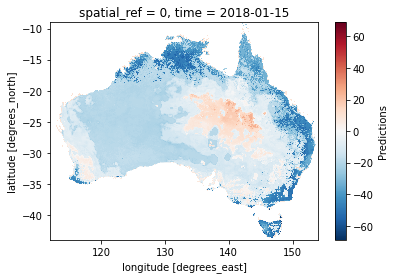

In [45]:
nee.isel(time=1).plot.imshow();